In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [74]:
df = pd.read_csv("data.csv")
df.head()

,x,y
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [75]:
df = df.rename(columns={'x' : "Height", 'y' : 'weight'})

In [76]:
df.shape

(99, 2)

In [77]:
df.head()

,Height,weight
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


<Axes: ylabel='Height'>

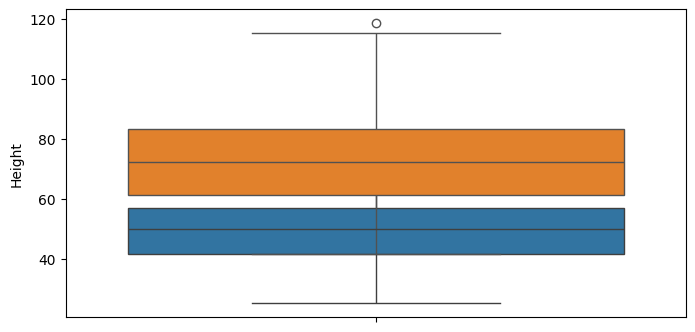

In [78]:
plt.figure(figsize=(8,4))
sns.boxplot(df['Height'])
sns.boxplot(df['weight'])

In [79]:
# outliers 

Q1 = df['weight'].quantile(.25)
Q3 = df['weight'].quantile(.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['weight'] >= lower) & (df['weight'] <= upper)]

In [80]:
df.shape

(98, 2)

<Axes: ylabel='weight'>

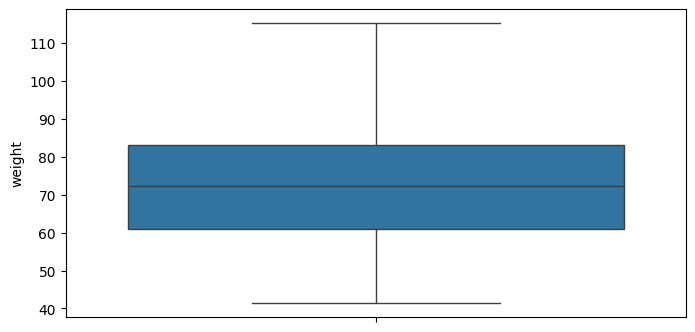

In [81]:
plt.figure(figsize=(8,4))
sns.boxplot(df['weight'])

In [82]:
df.columns

Index(['Height', 'weight'], dtype='object')

In [83]:
x = df[['Height']]
y = df[['weight']]

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [85]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(78, 1) (78, 1) (20, 1) (20, 1)


In [86]:
knn = KNeighborsRegressor()
model = knn.fit(x_train, y_train)
model

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [87]:
model.score(x_train, y_train)

0.5841880615462209

In [88]:
pred = model.predict(x_test)
pred

array([[54.38196343],
       [73.04718897],
       [76.09362787],
       [70.40267169],
       [85.73594706],
       [75.44447571],
       [80.50968401],
       [83.89213321],
       [77.33126016],
       [75.36909862],
       [91.12281255],
       [63.43794648],
       [81.19186677],
       [68.00328563],
       [58.12783381],
       [58.08285685],
       [73.99776646],
       [91.12281255],
       [93.56107835],
       [67.27473725]])

In [89]:
acc = r2_score(y_test, pred)
acc

0.415278307156142

In [90]:
pred1 = model.predict(df[['Height']])

In [91]:
df['weight_pred'] = pred1

In [92]:
df.head()

,Height,weight,weight_pred
0,48.955889,60.723602,75.369099
1,44.687196,82.892504,67.274737
2,60.297327,97.379897,78.438141
3,45.618644,48.847153,68.723410
4,38.816818,56.877213,58.082857


      Height     weight
0  48.955889  60.723602
1  44.687196  82.892504
2  60.297327  97.379897
3  45.618644  48.847153
4  38.816818  56.877213


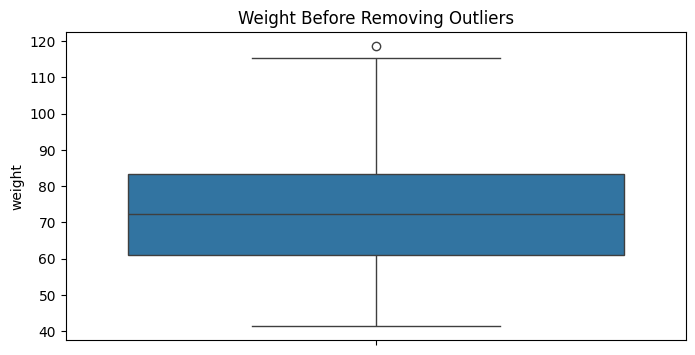

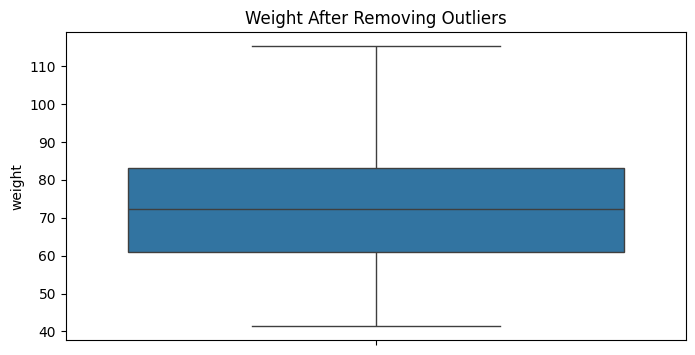

Train R2 Score: 0.5841880615462209
Model: KNeighborsRegressor()

📌 Evaluation Metrics:
R2 Score : 0.415278307156142
MSE      : 158.82102854934018
RMSE     : 12.602421535139197
MAE      : 10.125351792199998
      Height     weight  weight_pred
0  48.955889  60.723602    75.369099
1  44.687196  82.892504    67.274737
2  60.297327  97.379897    78.438141
3  45.618644  48.847153    68.723410
4  38.816818  56.877213    58.082857


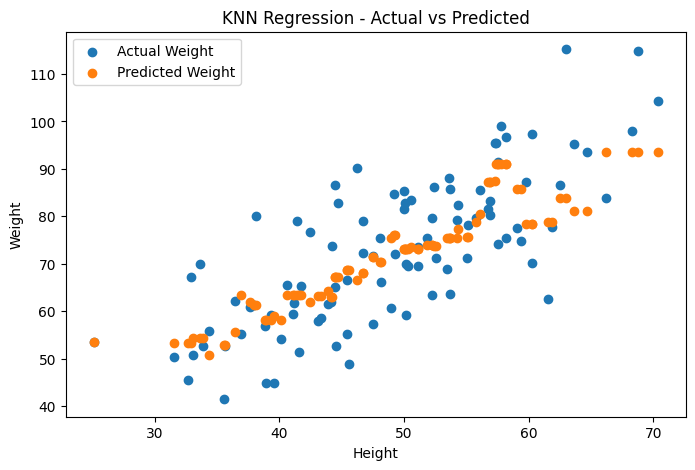

In [93]:
# -------------------------------------------
# 📌 1. Import Libraries
# -------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------------------------------
# 📌 2. Load and Rename Columns
# -------------------------------------------
df = pd.read_csv("data.csv")
df = df.rename(columns={'x': 'Height', 'y': 'weight'})

print(df.head())

# -------------------------------------------
# 📌 3. Check Outliers (Boxplot)
# -------------------------------------------
plt.figure(figsize=(8, 4))
sns.boxplot(df['weight'])
plt.title("Weight Before Removing Outliers")
plt.show()

# -------------------------------------------
# 📌 4. Remove Outliers Using IQR
# -------------------------------------------
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['weight'] >= lower) & (df['weight'] <= upper)]   # AND is correct

plt.figure(figsize=(8, 4))
sns.boxplot(df['weight'])
plt.title("Weight After Removing Outliers")
plt.show()

# -------------------------------------------
# 📌 5. Split Features & Target
# -------------------------------------------
x = df[['Height']]
y = df[['weight']]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# -------------------------------------------
# 📌 6. Train KNN Regressor
# -------------------------------------------
knn = KNeighborsRegressor(n_neighbors=5)
model = knn.fit(x_train, y_train)

print("Train R2 Score:", model.score(x_train, y_train))
print("Model:", model)

# -------------------------------------------
# 📌 7. Prediction on Test Set
# -------------------------------------------
pred = model.predict(x_test)

# -------------------------------------------
# 📌 8. Evaluate (Regression Metrics)
# -------------------------------------------
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)

print("\n📌 Evaluation Metrics:")
print("R2 Score :", r2)
print("MSE      :", mse)
print("RMSE     :", rmse)
print("MAE      :", mae)

# -------------------------------------------
# 📌 9. Predict Weight for Whole Dataset
# -------------------------------------------
df['weight_pred'] = model.predict(df[['Height']])

print(df.head())

# -------------------------------------------
# 📌 10. Plot Actual vs Predicted
# -------------------------------------------
plt.figure(figsize=(8,5))
plt.scatter(df['Height'], df['weight'], label="Actual Weight")
plt.scatter(df['Height'], df['weight_pred'], label="Predicted Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("KNN Regression - Actual vs Predicted")
plt.legend()
plt.show()
